<a href="https://colab.research.google.com/github/SaddamHosen42/Going_Abroad_prediction/blob/main/Going_Abroad_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Training a Machine Learning Model to Predict Abroad Study Outcome**

# **Load data**

In [ ]:
import pandas as pd
dataset=pd.read_csv("https://raw.githubusercontent.com/SaddamHosen42/Going_Abroad_prediction/refs/heads/main/Going_Abroad_prediction.csv")
dataset

,Gender,Age,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,GPA_IELTS_Feature,Result_feature,Top_Score,Feature_10,Feature_11,Feature_12,Cost_feature,Feature_14,Feature_15,Feature_16,Feature_17,Abroad_result
0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,Female,54,17.2,41,48,3,3,5,41.97,87.9,26.60,30.1,12.3,95231,9.67,17.66,0.102,6698,positive
1519,Male,23,16.8,47,40,4,3,4,38.00,99.2,32.60,33.6,14.7,167385,10.36,17.47,0.176,5694,positive
1520,Male,24,15.9,46,46,2,4,4,39.78,88.3,29.90,34.2,12.1,121163,8.94,13.95,0.136,5010,positive
1521,Male,49,13.2,41,49,2,3,5,51.07,92.0,32.80,32.0,15.0,201880,8.25,14.72,0.174,5767,positive


# **data preprocessing**

In [ ]:
print('Missing values in each column:')
print(dataset.isnull().sum())

Missing values in each column:
Gender               0
Age                  0
Feature_1            0
Feature_2            0
Feature_3            0
Feature_4            0
Feature_5            0
GPA_IELTS_Feature    0
Result_feature       0
Top_Score            0
Feature_10           0
Feature_11           0
Feature_12           0
Cost_feature         0
Feature_14           0
Feature_15           0
Feature_16           0
Feature_17           0
Abroad_result        0
dtype: int64


In [ ]:
print('Data types of each column:')
print(dataset.info())

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1523 non-null   object 
 1   Age                1523 non-null   int64  
 2   Feature_1          1523 non-null   float64
 3   Feature_2          1523 non-null   int64  
 4   Feature_3          1523 non-null   int64  
 5   Feature_4          1523 non-null   int64  
 6   Feature_5          1523 non-null   int64  
 7   GPA_IELTS_Feature  1523 non-null   int64  
 8   Result_feature     1523 non-null   float64
 9   Top_Score          1523 non-null   float64
 10  Feature_10         1523 non-null   float64
 11  Feature_11         1523 non-null   float64
 12  Feature_12         1523 non-null   float64
 13  Cost_feature       1523 non-null   int64  
 14  Feature_14         1523 non-null   float64
 15  Feature_15         1523 non-null   float64
 1

### Encode Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Gender' column
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# Encode 'Abroad_result' column (target variable)
dataset['Abroad_result_encoded'] = le.fit_transform(dataset['Abroad_result'])

dataset = dataset.drop('Abroad_result', axis=1)

print(dataset.head())
print(dataset.info())

   Gender       Age  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0       1 -1.263684   0.176163   0.809390   0.692105  -0.223734  -1.082887   
1       1 -0.674724   0.299118   0.579151   1.094423   2.257430  -0.083349   
2       1  0.699516   1.098328  -0.802284   0.893264   0.603321   1.915726   
3       0 -0.936484  -1.360777   0.348911   1.094423   3.084484   1.915726   
4       1 -0.347524   0.975372   0.118672   0.490945   0.603321   0.916188   

   GPA_IELTS_Feature  Result_feature  Top_Score  Feature_10  Feature_11  \
0           0.324376        0.788362   1.121628   -0.146752   -0.806008   
1           0.324376        1.293234   1.139764   -0.739240   -1.644076   
2           0.324376        1.377379   0.668220    0.692606    0.418859   
3           0.324376       -0.333574   0.033450    0.297614   -0.999409   
4           0.324376        1.497987   0.214813   -0.383747   -1.837476   

   Feature_12  Cost_feature  Feature_14  Feature_15  Feature_16  Feature_17  \
0

# **Data preparation**

### Separate Features & Target

In [23]:
X = dataset.drop('Abroad_result_encoded', axis=1)
y = dataset['Abroad_result_encoded']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1523, 19)
Target (y) shape: (1523,)


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Scaled Features (X) head:")
print(X.head())


Scaled Features (X) head:
     Gender       Age  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  1.058853 -1.263684   0.176163   0.809390   0.692105  -0.223734  -1.082887   
1  1.058853 -0.674724   0.299118   0.579151   1.094423   2.257430  -0.083349   
2  1.058853  0.699516   1.098328  -0.802284   0.893264   0.603321   1.915726   
3 -0.944418 -0.936484  -1.360777   0.348911   1.094423   3.084484   1.915726   
4  1.058853 -0.347524   0.975372   0.118672   0.490945   0.603321   0.916188   

   GPA_IELTS_Feature  Result_feature  Top_Score  Feature_10  Feature_11  \
0           0.324376        0.788362   1.121628   -0.146752   -0.806008   
1           0.324376        1.293234   1.139764   -0.739240   -1.644076   
2           0.324376        1.377379   0.668220    0.692606    0.418859   
3           0.324376       -0.333574   0.033450    0.297614   -0.999409   
4           0.324376        1.497987   0.214813   -0.383747   -1.837476   

   Feature_12  Cost_feature  Feature_14  F

### Data splitting

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

X_train

,Gender,Age,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,GPA_IELTS_Feature,Result_feature,Top_Score,Feature_10,Feature_11,Feature_12,Cost_feature,Feature_14,Feature_15,Feature_16,Feature_17,Gender_encoded
1478,1.058853,-0.674724,0.176163,0.809390,-0.514852,-1.050788,-1.082887,-1.059445,0.664949,-0.583183,-1.776095,0.999060,-1.633106,1.586987,-0.552559,-0.984320,-0.026387,0.969220,1.058853
1134,1.058853,0.241436,0.176163,1.039629,1.094423,-0.223734,-1.082887,-1.059445,0.353612,0.396176,-1.874843,-0.806008,-0.933940,1.010530,-0.069312,-1.240549,-0.021713,-0.439787,1.058853
19,1.058853,-0.609284,0.729462,-0.572045,0.893264,0.603321,1.915726,0.324376,1.242746,1.665716,0.593858,0.470433,0.653166,0.214049,0.720385,0.275470,-0.021546,-0.424835,1.058853
602,1.058853,0.961276,1.651626,0.809390,0.289786,-1.050788,-1.082887,-1.059445,-0.513084,-0.673865,1.186347,-1.257276,-1.772939,0.814345,0.107486,1.535260,-0.015370,0.809146,1.058853
1064,1.058853,0.764956,0.114686,0.118672,0.692105,-0.223734,-1.082887,-1.059445,1.007140,1.647580,-0.146752,1.579260,-0.933940,1.533678,0.484654,0.040594,-0.022047,-0.012335,1.058853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-0.944418,1.811997,0.790940,0.348911,0.490945,-0.223734,-0.083349,0.324376,-1.326488,0.069723,-1.134233,0.676726,-0.444524,-0.106620,1.569014,-1.382898,-0.023215,-0.815346,-0.944418
53,-0.944418,-0.740164,-1.354630,2.421064,-1.721808,-1.050788,-1.082887,0.324376,0.064713,0.033450,-1.050297,-2.378997,0.317567,-1.375178,-0.646852,-1.190726,-0.031394,-0.864600,-0.944418
350,1.058853,-0.805604,0.576383,1.730346,-2.727605,-1.050788,-1.082887,-1.059445,0.678973,-0.329275,0.904915,0.347946,1.296399,-1.328889,0.861823,-0.165812,-0.044915,-0.864600,1.058853
79,1.058853,0.241436,0.040912,1.500107,-2.727605,-0.223734,-0.083349,0.324376,0.491049,-1.598816,0.460548,-0.490122,0.786008,-1.205454,0.637879,0.083299,-0.031561,-0.864600,1.058853


In [31]:
X_test

,Gender,Age,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,GPA_IELTS_Feature,Result_feature,Top_Score,Feature_10,Feature_11,Feature_12,Cost_feature,Feature_14,Feature_15,Feature_16,Feature_17,Gender_encoded
800,-0.944418,-0.216644,-1.668166,-0.111567,-0.716011,-1.050788,-0.083349,-1.059445,0.611657,-1.762042,-0.986110,-0.483675,-1.283523,0.115178,-0.576133,-0.229870,-0.020211,-1.284136,-0.944418
719,-0.944418,1.419356,-1.668166,-0.572045,0.490945,0.603321,-1.082887,-1.059445,-1.256367,1.212309,1.778835,-0.548142,-0.933940,0.160818,0.296070,0.972981,-0.025552,-0.833817,-0.944418
883,-0.944418,-1.460004,0.667984,-0.572045,1.094423,-1.050788,-0.083349,-1.059445,1.152992,-1.127272,-0.492370,-0.290275,-0.514440,-0.324405,-1.271537,1.200740,-0.023716,0.479322,-0.944418
188,-0.944418,-0.085764,-1.337416,-1.493002,1.295583,0.603321,1.915726,3.092017,-0.103577,1.665716,0.050744,0.102972,0.988766,0.399202,-0.422908,0.083299,-0.044247,0.102883,-0.944418
228,1.058853,-0.805604,-0.315658,1.730346,-0.112533,-1.050788,-0.083349,1.708196,0.721046,-1.598816,-0.936736,-0.889815,0.394475,-1.467754,-1.825504,-1.119552,-0.047919,-1.216412,1.058853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,1.058853,-0.805604,0.360596,-0.341806,-0.716011,-0.223734,-1.082887,-1.059445,-0.291502,1.593171,0.495110,1.127993,-0.304691,-0.877888,1.486509,-1.126669,-0.016038,-0.577873,1.058853
479,-0.944418,1.942877,0.889304,-0.572045,0.893264,0.603321,1.915726,1.708196,1.175430,-0.329275,0.312426,0.231906,1.520132,-0.171685,0.720385,0.225648,-0.014869,0.718554,-0.944418
1220,-0.944418,0.764956,1.282761,-0.572045,0.692105,-1.050788,-0.083349,0.324376,1.691521,0.577539,-0.048004,-1.257276,-0.864023,-0.995584,1.238992,1.805723,-0.023549,-0.882191,-0.944418
256,1.058853,-1.001924,0.545029,0.118672,1.496742,3.911538,1.915726,1.708196,1.094090,1.665716,0.109993,0.057846,1.939631,-1.467754,0.567160,-0.201400,-0.025051,0.894460,1.058853


In [32]:
y_train

,Abroad_result_encoded
1478,1
1134,1
19,0
602,1
1064,1
...,...
802,1
53,1
350,0
79,1


In [33]:
y_test

,Abroad_result_encoded
800,0
719,0
883,1
188,0
228,1
...,...
876,0
479,0
1220,0
256,1


# **Model Building**

##  **Random Forest**

### Training the model

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

print("Random Forest Model trained")

Random Forest Model trained


### Applying the model to make a prediction

In [39]:
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

In [42]:
print (y_rf_train_pred)

[1 1 0 ... 0 1 0]


In [44]:
print (y_rf_test_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1]


### Evaluate model performance

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training Set Performance
accuracy_train = accuracy_score(y_train, y_rf_train_pred)
precision_train = precision_score(y_train, y_rf_train_pred)
recall_train = recall_score(y_train, y_rf_train_pred)
f1_train = f1_score(y_train, y_rf_train_pred)

print("Training Set Performance:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-score: {f1_train:.4f}")

print("\n" + "-" * 30 + "\n")

#Test Set Performance
accuracy_test = accuracy_score(y_test, y_rf_test_pred)
precision_test = precision_score(y_test, y_rf_test_pred)
recall_test = recall_score(y_test, y_rf_test_pred)
f1_test = f1_score(y_test, y_rf_test_pred)

print("Test Set Performance:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-score: {f1_test:.4f}")

Training Set Performance:
  Accuracy: 0.9984
  Precision: 0.9976
  Recall: 1.0000
  F1-score: 0.9988

------------------------------

Test Set Performance:
  Accuracy: 0.7541
  Precision: 0.7717
  Recall: 0.9202
  F1-score: 0.8394


In [49]:
rf_model_result = pd.DataFrame([['Random forest', accuracy_train, precision_train, recall_train ,f1_train, accuracy_test,precision_test,recall_test,f1_test]])
rf_model_result.columns = ['Method','Accuracy_train','Precision_train','Recall_train','F1_train', 'Accuracy_test','Precision_test','Recall_test','F1_test']
rf_model_result

,Method,Accuracy_train,Precision_train,Recall_train,F1_train,Accuracy_test,Precision_test,Recall_test,F1_test
0,Random forest,0.998358,0.997593,1.0,0.998795,0.754098,0.771654,0.920188,0.8394


## **Linear Regression**

### Training the model

In [50]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression Model trained")

Linear Regression Model trained


### Applying the model to make a prediction

In [63]:
y_lr_train_pred = lr_model.predict(X_train)
y_lr_test_pred = lr_model.predict(X_test)

print (y_lr_train_pred,y_lr_test_pred)

[1 1 0 ... 1 1 1] [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1]


### Evaluate model performance

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Convert continuous predictions to binary (0 or 1) using a threshold of 0.5
y_lr_train_pred_binary = (y_lr_train_pred > 0.5).astype(int)
y_lr_test_pred_binary = (y_lr_test_pred > 0.5).astype(int)

#Training Set Performance
accuracy_lr_train = accuracy_score(y_train, y_lr_train_pred_binary)
precision_lr_train = precision_score(y_train, y_lr_train_pred_binary, zero_division=0)
recall_lr_train = recall_score(y_train, y_lr_train_pred_binary, zero_division=0)
f1_lr_train = f1_score(y_train, y_lr_train_pred_binary, zero_division=0)

print("Training Set Performance:")
print(f"  Accuracy: {accuracy_lr_train:.4f}")
print(f"  Precision: {precision_lr_train:.4f}")
print(f"  Recall: {recall_lr_train:.4f}")
print(f"  F1-score: {f1_lr_train:.4f}")

print("\n" + "-" * 30 + "\n")

#Test Set Performance
accuracy_lr_test = accuracy_score(y_test, y_lr_test_pred_binary)
precision_lr_test = precision_score(y_test, y_lr_test_pred_binary, zero_division=0)
recall_lr_test = recall_score(y_test, y_lr_test_pred_binary, zero_division=0)
f1_lr_test = f1_score(y_test, y_lr_test_pred_binary, zero_division=0)

print("Test Set Performance:")
print(f"  Accuracy: {accuracy_lr_test:.4f}")
print(f"  Precision: {precision_lr_test:.4f}")
print(f"  Recall: {recall_lr_test:.4f}")
print(f"  F1-score: {f1_lr_test:.4f}")


Training Set Performance:
  Accuracy: 0.7594
  Precision: 0.7491
  Recall: 0.9723
  F1-score: 0.8462

------------------------------

Test Set Performance:
  Accuracy: 0.7279
  Precision: 0.7519
  Recall: 0.9108
  F1-score: 0.8238


In [56]:

lr_model_result = pd.DataFrame([['Linear Regression', accuracy_lr_train, precision_lr_train, recall_lr_train, f1_lr_train, accuracy_lr_test, precision_lr_test, recall_lr_test, f1_lr_test]])
lr_model_result.columns = ['Method','Accuracy_train','Precision_train','Recall_train','F1_train', 'Accuracy_test','Precision_test','Recall_test','F1_test']
lr_model_result

,Method,Accuracy_train,Precision_train,Recall_train,F1_train,Accuracy_test,Precision_test,Recall_test,F1_test
0,Linear Regression,0.759442,0.749071,0.972256,0.846194,0.727869,0.751938,0.910798,0.823779


## **Logistic Regression**

### Training the model

In [65]:
from sklearn.linear_model import LogisticRegression

logistic_r_model = LogisticRegression(random_state=100)
logistic_r_model.fit(X_train, y_train)

print("Logistic Regression Model trained")

Logistic Regression Model trained


### Applying the model to make a prediction

In [66]:
y_logistic_r_train_pred = logistic_r_model.predict(X_train)
y_logistic_r_test_pred = logistic_r_model.predict(X_test)

print (y_logistic_r_train_pred,y_logistic_r_test_pred)

[1 1 0 ... 1 1 1] [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1]


### Evaluate model performance

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Training Set Performance
accuracy_logistic_r_train = accuracy_score(y_train, y_logistic_r_train_pred)
precision_logistic_r_train = precision_score(y_train, y_logistic_r_train_pred, zero_division=0)
recall_logistic_r_train = recall_score(y_train, y_logistic_r_train_pred, zero_division=0)
f1_logistic_r_train = f1_score(y_train, y_logistic_r_train_pred, zero_division=0)

print("Logistic Regression - Training Set Performance:")
print(f"  Accuracy: {accuracy_logistic_r_train:.4f}")
print(f"  Precision: {precision_logistic_r_train:.4f}")
print(f"  Recall: {recall_logistic_r_train:.4f}")
print(f"  F1-score: {f1_logistic_r_train:.4f}")

print("\n" + "-" * 30 + "\n")

# Test Set Performance
accuracy_logistic_r_test = accuracy_score(y_test, y_logistic_r_test_pred)
precision_logistic_r_test = precision_score(y_test, y_logistic_r_test_pred, zero_division=0)
recall_logistic_r_test = recall_score(y_test, y_logistic_r_test_pred, zero_division=0)
f1_logistic_r_test = f1_score(y_test, y_logistic_r_test_pred, zero_division=0)

print("Logistic Regression - Test Set Performance:")
print(f"  Accuracy: {accuracy_logistic_r_test:.4f}")
print(f"  Precision: {precision_logistic_r_test:.4f}")
print(f"  Recall: {recall_logistic_r_test:.4f}")
print(f"  F1-score: {f1_logistic_r_test:.4f}")


Logistic Regression - Training Set Performance:
  Accuracy: 0.7611
  Precision: 0.7528
  Recall: 0.9662
  F1-score: 0.8463

------------------------------

Logistic Regression - Test Set Performance:
  Accuracy: 0.7279
  Precision: 0.7559
  Recall: 0.9014
  F1-score: 0.8223


In [69]:
logistic_r_model_result = pd.DataFrame([['Logistic Regression', accuracy_logistic_r_train, precision_logistic_r_train, recall_logistic_r_train, f1_logistic_r_train, accuracy_logistic_r_test, precision_logistic_r_test, recall_logistic_r_test, f1_logistic_r_test]])
logistic_r_model_result.columns = ['Method','Accuracy_train','Precision_train','Recall_train','F1_train', 'Accuracy_test','Precision_test','Recall_test','F1_test']

logistic_r_model_result

,Method,Accuracy_train,Precision_train,Recall_train,F1_train,Accuracy_test,Precision_test,Recall_test,F1_test
0,Logistic Regression,0.761084,0.75282,0.966224,0.846276,0.727869,0.755906,0.901408,0.82227


## **Model comparison**

In [70]:
df_models=pd.concat([rf_model_result,lr_model_result,logistic_r_model_result],axis=0)
df_models.reset_index(drop=True,inplace=True)
df_models

,Method,Accuracy_train,Precision_train,Recall_train,F1_train,Accuracy_test,Precision_test,Recall_test,F1_test
0,Random forest,0.998358,0.997593,1.000000,0.998795,0.754098,0.771654,0.920188,0.839400
1,Linear Regression,0.759442,0.749071,0.972256,0.846194,0.727869,0.751938,0.910798,0.823779
2,Logistic Regression,0.761084,0.752820,0.966224,0.846276,0.727869,0.755906,0.901408,0.822270


# **Data visualization of prediction results**

### Plot Model Comparison

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


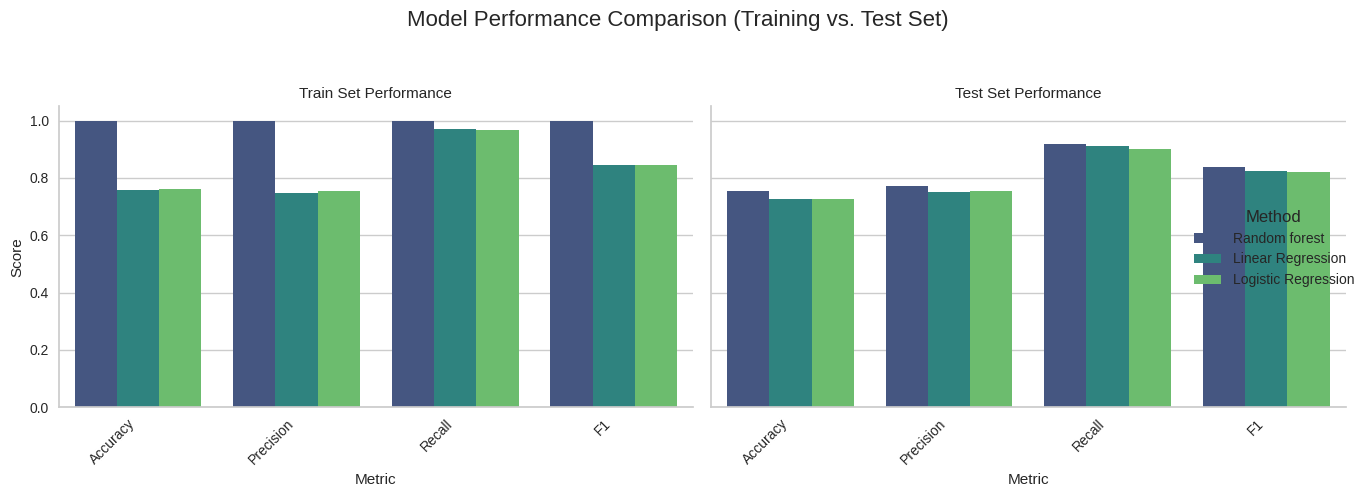

In [82]:
df_plot = df_models.melt(id_vars='Method', var_name='Metric', value_name='Score')

df_plot[['Metric_Name', 'Set']] = df_plot['Metric'].str.split('_', expand=True)
df_plot.loc[df_plot['Set'] == 'train', 'Set'] = 'Train'
df_plot.loc[df_plot['Set'] == 'test', 'Set'] = 'Test'

df_plot = df_plot[df_plot['Metric_Name'].isin(['Accuracy', 'Precision', 'Recall', 'F1'])]

g = sns.catplot(x='Metric_Name', y='Score', hue='Method', col='Set', data=df_plot, kind='bar', height=5, aspect=1.2, palette='viridis')
g.set_axis_labels("Metric", "Score")
g.set_titles("{col_name} Set Performance")

g.set_xticklabels(rotation=45, ha='right')

plt.suptitle('Model Performance Comparison (Training vs. Test Set)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Visualize Confusion Matrix


### Visualize Confusion Matrix for  Random Rorest Model

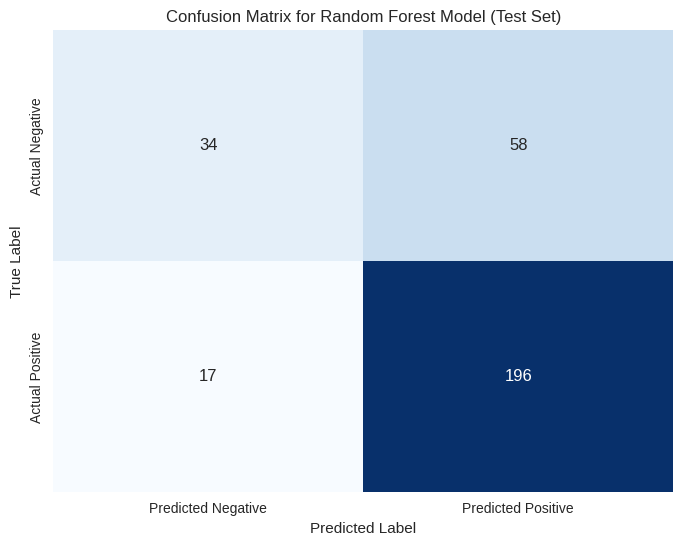

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_rf_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model (Test Set)')
plt.show()

### Visualize Confusion Matrix for Logistic Regression Model

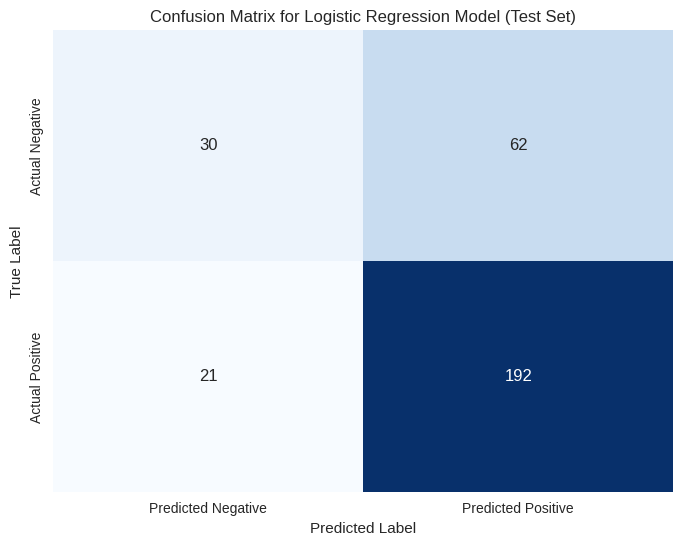

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logistic_r = confusion_matrix(y_test, y_logistic_r_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic_r, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model (Test Set)')
plt.show()

### Visualize Confusion Matrix for Linear Regression Model

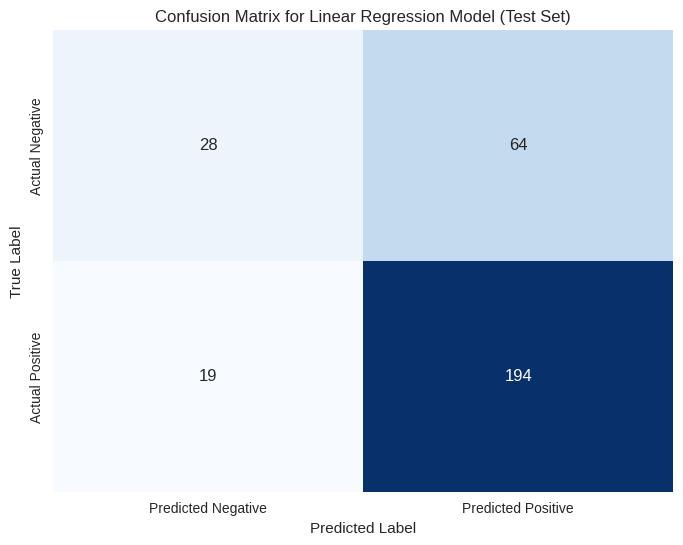

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_lr_test_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear Regression Model (Test Set)')
plt.show()